In [34]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/encoded.csv', index_col='date',parse_dates=['date'])
df.head()

,Unnamed: 0,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
date,,,,,,,,,,,,,,
2015-05-12,0,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
2016-03-09,1,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2018-08-19,2,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
2018-08-08,3,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
2015-03-07,4,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [11]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [5]:
df = df[['date']].copy()
df['count'] = 1
df.head()

,date,count
0,2015-05-12,1
1,2016-03-09,1
2,2018-08-19,1
3,2018-08-08,1
4,2015-03-07,1


In [ ]:
df.date = pd.to_datetime(df.date)
df.head()

# Количество аварий в год

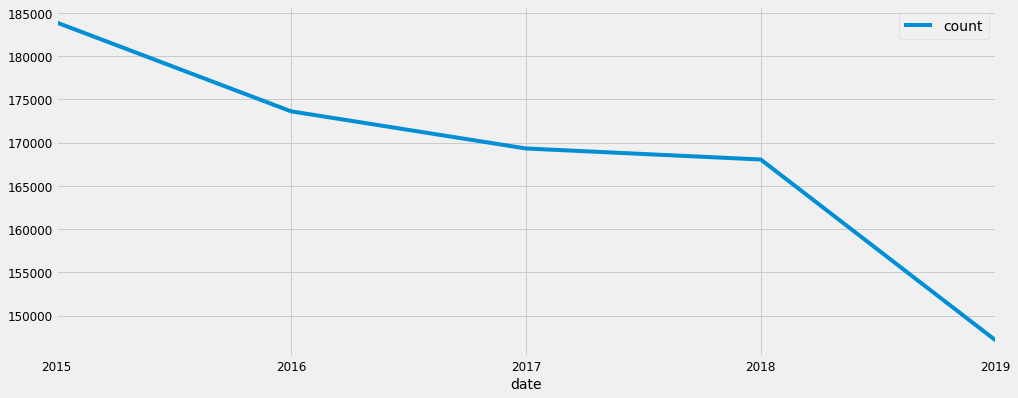

In [12]:
y = df.groupby(pd.Grouper(key='date',freq='Y')).count()
y
y.plot(figsize=(15, 6))
plt.show()

# Количество аварий за каждый месяц

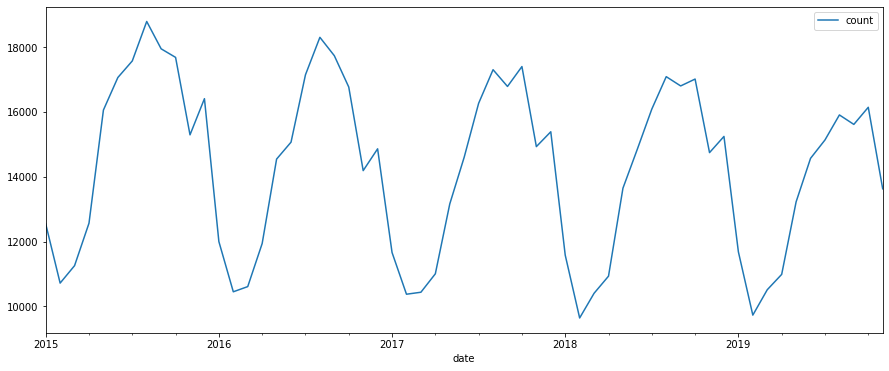

In [8]:
dtp_by_months = df.groupby(pd.Grouper(key='date',freq='M')).count()
dtp_by_months.head()
dtp_by_months.plot(figsize=(15, 6))
plt.show()

# Количество аварий по дням недели

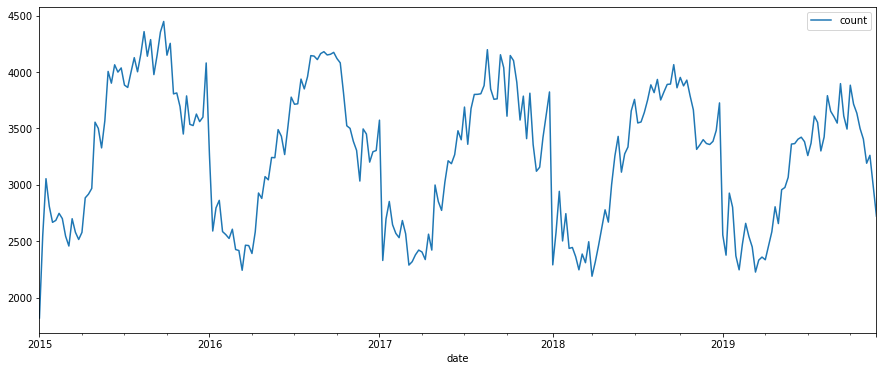

In [9]:
dtp_by_weeks = df.groupby(pd.Grouper(key='date',freq='W')).count()
dtp_by_weeks.head()
dtp_by_weeks.plot(figsize=(15, 6))
plt.show()

In [36]:
df = df.sort_values(by=['date'])
df

,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
date,,,,,,,,,,,,,
2015-01-01,21:30:00,г. Дербент,г Дербент,2,0,0,2,0,2,1,0,1,4
2015-01-01,23:00:00,Центральный,г Чита,2,1,1,1,0,1,1,1,1,7
2015-01-01,02:45:00,Железнодорожный,г Чита,1,1,0,2,0,1,0,0,2,5
2015-01-01,13:05:00,Индустриальный район,г Хабаровск,2,0,2,1,0,1,1,0,0,5
2015-01-01,22:15:00,Шелопугинский,с Шелопугино,1,1,0,2,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,04:58:00,г. Калуга,г Калуга,1,0,1,1,0,2,0,0,2,5
2019-11-30,13:00:00,Хабаровский район,с Мирное,0,0,2,2,1,1,1,0,0,5
2019-11-30,13:14:00,Мотовилихинский,г Пермь,0,1,2,1,1,1,1,0,0,7


In [41]:
y = df['alco'].resample('M').mean()
y.head()

date
2015-01-31    0.254025
2015-02-28    0.255807
2015-03-31    0.261437
2015-04-30    0.275165
2015-05-31    0.291194
Freq: M, Name: alco, dtype: float64

## График фиксирования алкогольного опьянения в ДТП

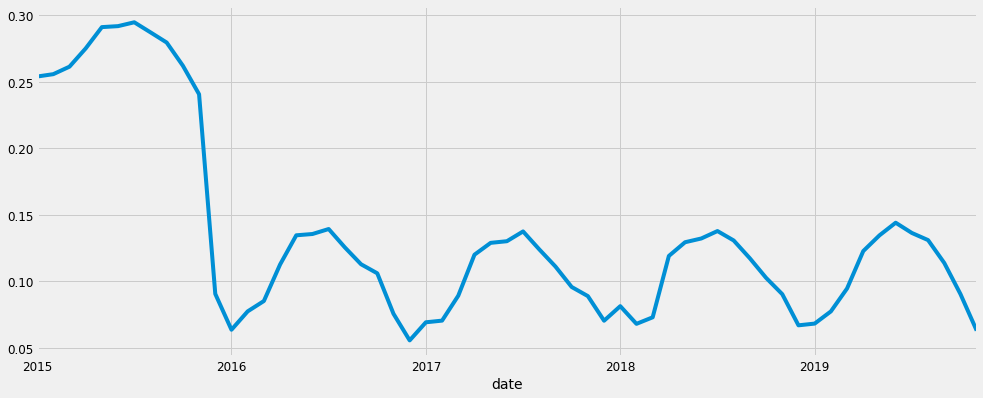

In [42]:
y.plot(figsize=(15, 6))
plt.show()

## Стоит отметить, что количество ДТП при участии водителей в нетрезвом виде резко сократилось в период с 2015 года на 2016 год, это можно объяснить ужесточением закона 1 июля 2015 года, по которому водитель, попавшийся в состоянии алкогольного опьянения повторно в течение года, привлекается к уголовной ответственности. Пиковые значения отмечаются наиболее в летние периоды года. За период 2016-2019 года количество аварий при нетрезвом водителе не снижается, а находится примерно на одном уровне. Хотя периодичность внутри года наблюдается.

In [44]:
y = df['woman_drv'].resample('M').mean()
y.head()

date
2015-01-31    0.199187
2015-02-28    0.198526
2015-03-31    0.181487
2015-04-30    0.184770
2015-05-31    0.182775
Freq: M, Name: woman_drv, dtype: float64

## График фиксирования ДТП с участием водителей женского пола

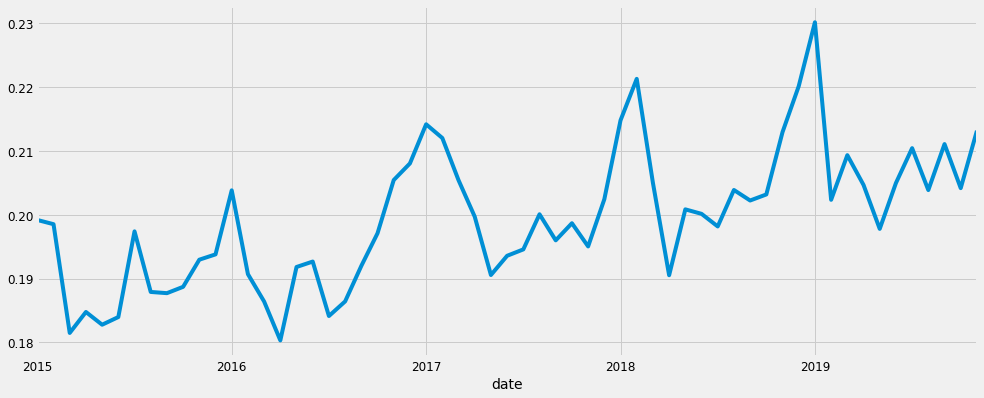

In [45]:
y.plot(figsize=(15, 6))
plt.show()

## В более 70% случаев ДТП происходит при участии водителей мужского пола, из графика интересно отметить - показатель, что хотя бы один из водителей является женщина, увеличивается с каждым годом. Это может быть обусловлено возросшим интересом женщин к управлению ТС и получению водительских прав.

In [46]:
y = df['s_pch'].resample('M').mean()
y.head()

date
2015-01-31    0.640284
2015-02-28    0.631589
2015-03-31    0.686240
2015-04-30    0.738203
2015-05-31    0.859945
Freq: M, Name: s_pch, dtype: float64

## График показателей состояния дорожного полотна в момент ДТП

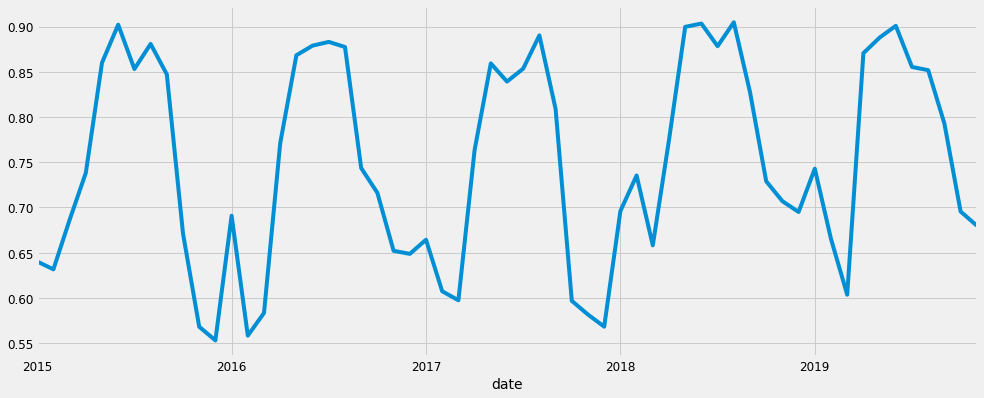

In [47]:
y.plot(figsize=(15, 6))
plt.show()

## В большиинстве случаев ДТП происходило при хорошем состоянии дорожного полотна, из графика также видно, что состояние дорожного полотна ухудшается в зимние периоды года.